In [2]:
from gensim.models import Word2Vec

from nltk.cluster import KMeansClusterer
import nltk
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [3]:
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [4]:
data = pd.read_csv("GlobalWarmingAbstract414.csv")
data['abstract'][1]

'Examines the possibility of global climate change due to the emission of carbon dioxide and other greenhouse gases. The problem can be ameliorated by reducing fossil fuel consumption through conservation and expanded use of nuclear and solar power. In particular, major reductions can be achieved if fossil fuels are replaced in electricity generation and if electricity assumes a larger role in the overall energy economy.'

In [5]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize


In [69]:
#example string input
string=data['abstract']
train=string.loc[:286]
test=string.loc[287:410]
#removing stopwords
def string_vectorizer (string):
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(string) 
  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = []   
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    print(word_tokens) 
    print(filtered_sentence) 

    #joining back the processed strings
    my_str = ' '.join(map(str, filtered_sentence))
    string=split_into_sentences(my_str)

    temp=[None] * len(string)
    temp=[s.split(' ') for s in string ]
    return temp
for t in train:
    temp=temp+string_vectorizer(t)


['We', 'evaluate', 'to', 'what', 'extent', 'the', 'temperature', 'rise', 'in', 'the', 'past', '100', 'years', 'was', 'a', 'trend', 'or', 'a', 'natural', 'fluctuation', 'and', 'analyze', '2249', 'world-', 'wide', 'monthly', 'temperature', 'records', 'from', 'GISS', '(', 'NASA', ')', 'with', 'the', '100-year', 'period', 'covering', '1906-2005', 'and', 'the', 'two', '50-year', 'periods', 'from', '1906', 'to', '1955', 'and', '1956', 'to', '2005', '.', 'No', 'global', 'records', 'are', 'applied', '.', 'The', 'data', 'document', 'a', 'strong', 'urban', 'heat', 'island', 'effect', '(', 'UHI', ')', 'and', 'a', 'warming', 'with', 'increasing', 'station', 'elevation', '.', 'For', 'the', 'period', '1906-2005', ',', 'we', 'evaluate', 'a', 'global', 'warm-', 'ing', 'of', '0.58', '0C', 'as', 'the', 'mean', 'for', 'all', 'records', '.', 'This', 'decreases', 'to', '0.41', '0C', 'if', 'restricted', 'to', 'stations', 'with', 'a', 'population', 'of', 'less', 'than', '1000', 'and', 'below', '800', 'meter'

['Most', 'baleen', 'whales', 'undertake', 'migrations', 'between', 'low-latitude', 'breeding', 'grounds', 'and', 'high-latitude', 'feeding', 'grounds', '.', 'Though', 'little', 'is', 'known', 'about', 'the', 'timing', 'of', 'their', 'migration', 'from', 'the', 'Arctic', ',', 'fin', 'whales', 'are', 'assumed', 'to', 'undertake', 'a', 'similar', 'migratory', 'pattern', '.', 'To', 'address', 'questions', 'about', 'habitat', 'use', 'and', 'migrations', ',', 'the', 'acoustic', 'activity', 'of', 'fin', 'whales', 'in', 'Davis', 'Strait', ',', 'between', 'Greenland', 'and', 'Canada', ',', 'was', 'monitored', 'continuously', 'for', 'two', 'years', 'using', 'three', 'bottom-moored', 'acoustic', 'recorders', '.', 'The', 'acoustic', 'power', 'in', 'the', 'fin', 'whale', 'call', 'frequencies', 'peaked', 'in', 'November–December', ',', 'showing', 'that', 'fin', 'whales', 'are', 'present', 'in', 'Davis', 'Strait', 'much', 'later', 'in', 'the', 'year', 'than', 'previously', 'expected', '.', 'The', 'cl

['Due', 'to', 'the', 'ozone', 'depletion', 'potential', 'and', 'global', 'warming', 'potential', 'of', 'CFCs', 'and', 'HCFCs', ',', 'CO2', 'is', 'considered', 'as', 'most', 'potential', 'alternative', 'refrigerant', '.', 'However', ',', 'there', 'are', 'serious', 'throttle', 'losses', 'and', 'low', 'system', 'efficiency', 'to', 'CO2', 'trans-critical', 'cycle', 'because', 'of', 'its', 'low', 'critical', 'temperature', 'and', 'high', 'operating', 'pressure', '.', 'The', 'aim', 'of', 'this', 'paper', 'is', 'to', 'design', 'an', 'expander', 'to', 'recover', 'expansion', 'power', 'in', 'CO2', 'trans-critical', 'cycle', '.', 'The', 'theoretical', 'analysis', 'and', 'calculation', 'show', 'that', '14–23', '%', 'of', 'input', 'power', 'of', 'compressor', 'can', 'be', 'recovered', '.', 'A', 'prototype', 'of', 'rolling', 'piston', 'expander', 'is', 'designed', 'and', 'manufactured', 'and', 'its', 'test', 'facility', 'is', 'established', '.', 'The', 'test', 'facility', 'consists', 'of', 'CO2', '

['At', 'last', ',', 'all', 'the', 'major', 'emitters', 'of', 'greenhouse', 'gases', '(', 'GHGs', ')', 'have', 'agreed', 'under', 'the', 'Copenhagen', 'Accord', 'that', 'global', 'average', 'temperature', 'increase', 'should', 'be', 'kept', 'below', '2', '°C', '.', 'This', 'study', 'develops', 'the', 'criteria', 'for', 'limiting', 'the', 'warming', 'below', '2', '°C', ',', 'identifies', 'the', 'constraints', 'imposed', 'on', 'policy', 'makers', ',', 'and', 'explores', 'available', 'mitigation', 'avenues', '.', 'One', 'important', 'criterion', 'is', 'that', 'the', 'radiant', 'energy', 'added', 'by', 'human', 'activities', 'should', 'not', 'exceed', '2.5', '(', 'range', ':', '1.7–4', ')', 'watts', 'per', 'square', 'meter', '(', 'Wm−2', ')', 'of', 'the', 'Earth', "'s", 'surface', '.', 'The', 'blanket', 'of', 'man-made', 'GHGs', 'has', 'already', 'added', '3', '(', 'range', ':', '2.6–3.5', ')', 'Wm−2', '.', 'Even', 'if', 'GHG', 'emissions', 'peak', 'in', '2015', ',', 'the', 'radiant', 'ener

['The', 'Community', 'Multiscale', 'Air', 'Quality', '(', 'CMAQ', ')', 'modeling', 'system', ',', 'a', 'state-of-the-science', 'regional', 'air', 'quality', 'modeling', 'system', 'developed', 'by', 'the', 'US', 'Environmental', 'Pro-', 'tection', 'Agency', ',', 'is', 'being', 'used', 'for', 'a', 'variety', 'of', 'environmen-', 'tal', 'modeling', 'problems', 'including', 'regulatory', 'applications', ',', 'air', 'quality', 'forecasting', ',', 'evaluation', 'of', 'emissions', 'control', 'strate-', 'gies', ',', 'process-level', 'research', ',', 'and', 'interactions', 'of', 'global', 'cli-', 'mate', 'change', 'and', 'regional', 'air', 'quality', '.', 'The', 'Meteorology-', 'Chemistry', 'Interface', 'Processor', '(', 'MCIP', ')', 'is', 'a', 'vital', 'piece', 'of', 'software', 'within', 'the', 'CMAQ', 'modeling', 'system', 'that', 'serves', 'to', ',', 'as', 'best', 'as', 'possible', ',', 'maintain', 'dynamic', 'consistency', 'between', 'the', 'meteorological', 'model', 'and', 'the', 'chemica

['Implementing', 'the', 'large', 'number', 'of', 'nuclear', 'power', 'plant', 'projects', 'worldwide', 'presupposes', 'a', 'considerable', 'increase', 'in', 'the', 'production', 'of', 'natural', 'uranium', '.', 'Preparations', 'have', 'been', 'made', ':', 'Higher', 'uranium', 'prices', 'stimulate', 'investments', 'into', 'future', 'mines', 'and', 'into', 'uranium', 'exploration', '.', 'In', 'some', 'countries', ',', 'the', 'uranium', 'industry', 'is', 'undergoing', 'structural', 'changes', 'so', 'as', 'to', 'be', 'able', 'to', 'meet', 'future', 'requirements', '.', 'The', 'terms', 'and', 'conditions', 'laid', 'down', 'in', 'long-term', 'uranium', 'supply', 'contracts', '(', 'prices', 'and', 'fixed', 'delivery', 'volumes', ')', 'provide', 'present', 'and', 'future', 'producers', 'with', 'the', 'necessary', 'security', 'in', 'investing', 'and', 'planning', '.', 'The', 'electricity', 'utilities', 'have', 'accepted', 'the', 'shift', 'from', 'a', 'former', "'buyer", "'s", 'market', "'", 'to

In [70]:
model = Word2Vec(temp, min_count=1)

In [8]:
#print (model.similarity('correlated', 'relationship'))
#print (model.similarity('DOC', 'POC'))

#print (model.most_similar(positive=['abundance'], negative=[], topn=2))
#output: [('new', 0.24608060717582703), ('is', 0.06899910420179367)]
#print (model['relative'])
#output [-0.00217354 -0.00237131  0.00296396 ...,  0.00138597  0.00291924  0.00409528]

Embedding function

In [71]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [72]:
#getting input matrix
X=[]
for t in temp:
    X.append(sent_vectorizer(t, model))    
print ("========================")
print (len(X))

print (model[model.wv.vocab])

C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


11746
[[ 0.06128188 -0.33474126  0.3484433  ... -0.80937487  0.8547295
  -0.26498958]
 [-0.01270285 -0.15161066  0.15703918 ... -0.42441067  0.4878015
  -0.13459286]
 [-0.00738572 -0.21139608  0.2453948  ... -0.4821887   0.49385664
  -0.1877912 ]
 ...
 [ 0.00172024 -0.00784081  0.00968892 ... -0.01150716  0.01284826
  -0.00469988]
 [ 0.00133793 -0.00886665  0.01379652 ... -0.03034682  0.02593712
  -0.01251906]
 [-0.00515126 -0.01920345  0.01451056 ... -0.03596847  0.03395551
  -0.00949534]]


C:\Users\shanw\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [73]:
#defining clusters
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)  
  

[1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 

1:['We', 'evaluate', 'extent', 'temperature', 'rise', 'past', '100', 'years', 'trend', 'natural', 'fluctuation', 'analyze', '2249', 'world-', 'wide', 'monthly', 'temperature', 'records', 'GISS', '(', 'NASA', ')', '100-year', 'period', 'covering', '1906-2005', 'two', '50-year', 'periods', '1906', '1955', '1956', '2005', '.']
2:['No', 'global', 'records', 'applied', '.']
1:['The', 'data', 'document', 'strong', 'urban', 'heat', 'island', 'effect', '(', 'UHI', ')', 'warming', 'increasing', 'station', 'elevation', '.']
1:['For', 'period', '1906-2005', ',', 'evaluate', 'global', 'warm-', 'ing', '0.']
1:['58', '0C', 'mean', 'records', '.']
1:['This', 'decreases', '0.']
1:['41', '0C', 'restricted', 'stations', 'population', 'less', '1000', '800', 'meter', 'sea', 'level', '.']
1:['About', 'quarter', 'records', '100-year', 'period', 'show', 'fall', 'temperatures', '.']
1:['Our', 'hypothesis', 'analysis', '-', 'generally', 'papers', 'concerned', 'long-term', 'persistence', 'temper-', 'ature', 're

1:['At', 'last', ',', 'major', 'emitters', 'greenhouse', 'gases', '(', 'GHGs', ')', 'agreed', 'Copenhagen', 'Accord', 'global', 'average', 'temperature', 'increase', 'kept', '2', '°C', '.']
1:['This', 'study', 'develops', 'criteria', 'limiting', 'warming', '2', '°C', ',', 'identifies', 'constraints', 'imposed', 'policy', 'makers', ',', 'explores', 'available', 'mitigation', 'avenues', '.']
1:['One', 'important', 'criterion', 'radiant', 'energy', 'added', 'human', 'activities', 'exceed', '2.']
0:['5', '(', 'range', ':', '1.']
0:['7–4', ')', 'watts', 'per', 'square', 'meter', '(', 'Wm−2', ')', 'Earth', "'s", 'surface', '.']
0:['The', 'blanket', 'man-made', 'GHGs', 'already', 'added', '3', '(', 'range', ':', '2.']
0:['6–3.']
0:['5', ')', 'Wm−2', '.']
0:['Even', 'GHG', 'emissions', 'peak', '2015', ',', 'radiant', 'energy', 'barrier', 'exceeded', '100', '%', ',', 'requiring', 'simultaneous', 'pursuit', 'three', 'avenues', ':', '(', ')', 'reduce', 'rate', 'thickening', 'blanket', 'stabilizin

1:['According', 'alternative', 'states', 'hypothesis', 'expect', 'ecological', 'resistance', 'nutrient', 'loading', 'reduction', 'P', 'hysteresis', '.']
1:['We', 'present', 'results', 'suggesting', 'two', 'alternative', 'states', 'less', 'stable', 'originally', 'anticipated', '.']
2:['How', 'global', 'warming', 'affects', 'water', 'clarity', 'shallow', 'lakes', 'debatable', '.']
1:['We', 'suggest', 'water', 'clarity', 'often', 'decrease', 'due', 'either', 'enhanced', 'growth', 'phytoplankton', ',', 'submerged', 'macrophytes', 'stimulated', ',', 'reduced', 'capacity', 'plants', 'maintain', 'clear-water', 'conditions', '.']
1:['The', 'latter', 'supported', 'cross-system', 'comparison', 'lakes', 'Florida', 'Denmark', '.']
1:['The', 'proportion', 'small', 'fish', 'might', 'increase', 'might', 'see', 'higher', 'aggregation', 'fish', 'within', 'vegetation', '(', 'leading', 'loss', 'zooplankton', 'refuges', ')', ',', 'annual', 'fish', 'cohorts', ',', 'omnivorous', 'feeding', 'fish', 'less', '

0:['Ovary', 'transverse', 'sections', '(', '12', '20', 'μm', 'thick', ')', 'observed', 'light', 'microscopy', '(', 'BX-50', ';', 'Olympus', ',', 'Tokyo', ')', ',', 'number', 'ovules', 'counted', '15', 'ovaries', '.']
1:['Seed', 'number', 'fruit', 'fresh', 'weight', '30', 'mature', 'fruit', 'also', 'measured', '.']
1:['Pollen', 'tube', 'elongation', 'style', '.']
1:['All', 'tomato', 'seeds', 'sown', '16', 'Apr', '.']
1:['2004', 'cultivated', '28.']
2:['9/16.']
0:['4', '°C', '(', 'maximum/minimum', 'temperature', ')', 'greenhouse', '.']
1:['Five', '15', 'flowers', 'per', 'plant', 'opened', '5', '7', 'June', 'emasculated', 'anthesis', ',', 'five', 'flowers', 'per', 'plant', 'artificially', 'pollinated', '.']
1:['Twenty', 'styles', 'sampled', '72', 'h', 'pollination', 'fixed', '.']
0:['After', 'fixation', ',', 'styles', 'embedded', '8', '%', 'agar', 'block', '.']
0:['Transverse', 'sections', '200', 'μm', 'thick', ',', 'including', 'four', 'style', 'sections', 'distinguished', '(', 'Fig', '

1:['The', 'results', 'suggest', 'major', 'source', 'air', 'water', 'emissions', 'life', 'cycle', 'milk', 'production', 'concentrates', '.']
0:['The', 'activities', 'carried', 'dairy', 'farms', 'major', 'source', 'nitrous', 'oxides', '(', 'fuel', 'combustion', ')', ',', 'ammonia', ',', 'methane', '(', 'manure', 'management', 'enteric', 'fermentation', ')', '.']
1:['Nevertheless', ',', 'dairy', 'farm', 'activities', ',', 'include', 'manure', 'management', ',', 'enteric', 'fermentation', 'diesel', 'consumption', ',', 'make', 'greatest', 'contributions', 'categories', 'impact', 'considered', ',', 'exception', 'abiotic', 'depletion', 'category', ',', 'contributing', '70', '%', 'total', 'global', 'warming', 'potential', '(', '1021.']
0:['3', 'kg', 'CO2', 'eq', '.']
0:['per', 'tonne', 'milk', ')', ',', '84', '%', 'total', 'photochemical', 'oxidation', 'potential', '(', '0.']
0:['2', 'kg', 'C2H4', 'eq', '.']
0:['per', 'tonne', 'milk', ')', ',', '70', '%', 'total', 'acidification', 'potential',

1:['In', 'extreme', 'environments', 'main', 'continent', 'vegetation', 'scattered', 'composed', 'lichens', 'mosses', '.']
2:['There', 'interest', 'possible', 'effects', 'global', 'climate', 'change', 'communities', 'acting', 'changes', 'temperature', 'precipitation', '.']
1:['Lichens', 'extensively', 'used', 'date', 'substrates', 'growing', 'using', 'techniques', 'lichenometry', '.']
1:['The', 'slow', 'growth', 'longevity', 'lichens', 'particularly', 'suites', 'use', '.']
1:['We', 'present', 'evidence', 'appears', 'substantial', '(', 'two', 'orders', 'magnitude', ')', 'cline', 'lichen', 'growth', 'rate', 'warmer', ',', 'wetter', 'productive', 'Peninsula', 'cold', 'Dry', 'Valleys', '77°S', 'latitude', '.']
1:['The', 'differences', 'growth', 'rate', 'reflect', 'precipitation', 'temperature', 'regimes', 'different', 'sites', '.']
2:['The', 'large', 'range', 'growth', 'rates', 'coupled', 'simplicity', 'measuring', 'lichen', 'growth', 'using', 'modern', 'techniques', 'suggests', 'could', 'e

2:['Thus', ',', 'FSBSG', 'may', 'second', 'leading', 'cause', 'warming', 'CO2', '.']
2:['Controlling', 'FS', 'BSG', 'may', 'faster', 'method', 'reducing', 'Arctic', 'ice', 'loss', 'global', 'warming', 'options', ',', 'including', 'controlling', 'CH4', 'CO2', ',', 'although', 'controls', 'needed', '.']
1:['This', 'study', 'proposes', 'new', 'use', 'Data', 'Envelopment', 'Analysis', '(', 'DEA', ')', 'measure', 'operational', ',', 'environmental', 'both-unified', 'efficiency', 'measures', 'US', 'coal-fired', 'power', 'plants', '.']
0:['The', 'power', 'plants', 'produce', 'desirable', 'outputs', '(', 'e.g.', ',', 'electricity', ')', 'also', 'undesirable', 'outputs', '(', 'e.g.', ',', 'CO2', 'NOx', ')', 'result', 'plant', 'operations', '.']
0:['A', 'Range-Adjusted', 'Measure', '(', 'RAM', ')', 'used', 'original', 'non-radial', 'DEA', 'model', '.']
0:['Then', ',', 'reformulated', 'handling', 'undesirable', '(', 'bad', ')', 'outputs', '.']
0:['The', 'proposed', 'use', 'DEA', 'models', 'measur

1:['Despite', 'qualitative', 'quantitative', 'importance', 'A.', 'salinus', 'systems', ',', 'attention', 'paid', 'effect', 'temperature', 'population', 'dynamics', '.']
1:['For', 'reason', ',', 'variability', 'post-embryonic', 'development', 'times', 'stage-specific', 'mortality', 'A.', 'salinus', 'studied', 'temperature-range', 'species', 'occurs', '.']
1:['Mortality', 'higher', 'earlier', 'naupliar', 'first', 'copepodite', 'stages', '.']
1:['The', 'highest', 'developmental', 'variability', 'mortality', 'occurred', 'highest', 'temperature', '.']
1:['Developmental', 'instability', 'could', 'explain', 'high', 'variability', 'high', 'temperatures', 'fluctuating', 'speed', 'development', 'throughout', 'successive', 'stages', '.']
1:['The', 'interaction', 'mortality', 'developmental', 'variability', 'might', 'important', 'mechanism', 'ensuring', 'persistence', 'A.', 'salinus', 'populations', 'fluctuating', 'stressing', 'environments', '.']
1:['A', 'high', 'temporal', 'resolution', 'pollen'

Cluster id labels for inputted data
[2 0 0 ... 2 2 1]
Centroids data
[[-0.0596128  -0.17422408  0.22026661 -0.33880752  0.13018898  0.207226
   0.38398328 -0.19900301  0.26504655  0.23091458  0.24449551  0.16784406
  -0.65450954 -0.19493146 -0.68537654  0.16319824 -0.00573167 -0.21230738
  -0.24741673  0.13794349  0.07839232  0.08069057 -0.16610666  0.17940635
   0.305624   -0.56406088  0.40571021 -0.03294668 -0.06812489 -0.52770698
  -0.37281028 -0.38456397 -0.10211078 -0.14569769 -0.14507482 -0.26565986
   0.33266757  0.29764722 -0.44968137  0.07394006  0.426514    0.50799021
  -0.13759341  0.24924202 -0.11123717  0.54212481 -0.2279829  -0.4150037
   0.62587003 -0.47907115 -0.4533634   0.78079349  0.24649088  0.11687487
   0.42695811 -0.23254119 -0.00175482  0.23378807  0.51244482 -0.1247745
   0.28509656  0.90955388  0.19763622 -0.0596153   0.51826025  0.01292855
   0.0230836   0.45158516 -0.33477231  0.19488265  0.42264291  0.15041268
   0.73414535 -0.06992965  0.98520975  0.271541

1 ['However', ',', 'inherent', 'complexity', 'full', 'LCA', 'CF', 'analysis', 'often', 'stands', 'way', 'widespread', 'application', 'industry', 'policy-making', 'sectors', '.']
1 ['For', 'latter', 'ambits', ',', 'paper', 'advocates', 'adoption', 'tailor-made', 'streamlined', 'approaches', ',', 'reduced', 'inventory', 'requirements', 'impact', 'assessment', 'scope', '.']
1 ['Two', 'examples', 'provided', ',', 'respectively', 'addressing', 'evaluation', 'GWP', 'development', 'new', 'product', 'standards', 'GWP', 'savings', 'attainable', 'use', 'recycled', 'materials', '.']
1 ['Materials', 'methods', 'Both', 'application', 'examples', 'presented', 'firmly', 'rooted', 'life', 'cycle', 'thinking', ',', 'follow', 'guidelines', 'provided', 'current', 'ISO', 'standards', 'LCA', '.']
1 ['At', 'time', ',', 'employed', 'models', 'structured', 'way', 'require', 'deployment', 'specific', 'LCA', 'software', 'rely', 'simple', 'algorithms', 'instead', ',', 'complemented', 'tables', 'data', 'associate

2 ['The', 'time', 'potential', 'establishment', 'corresponding', 'rise', 'biological', 'risk', 'varies', 'scenarios', ',', 'due', 'differences', 'predicted', 'rate', 'temperature', 'increase', '.']
1 ['Warming', 'could', 'strongly', 'stabilize', 'destabilize', 'populations', 'food', 'webs', 'changing', 'interaction', 'strengths', 'predators', 'prey', '.']
0 ['Predicting', 'consequences', 'warming', 'requires', 'understanding', 'temperature', 'affects', 'ingestion', '(', 'energy', 'gain', ')', 'metabolism', '(', 'energy', 'loss', ')', '.']
0 ['Here', ',', 'studied', 'temperature', 'dependence', 'metabolism', 'ingestion', 'laboratory', 'experiments', 'terrestrial', 'arthropods', '(', 'beetles', 'spiders', ')', '.']
0 ['From', 'data', ',', 'calculated', 'ingestion', 'efficiencies', '(', 'ingestion/metabolism', ')', 'per', 'capita', 'interaction', 'strengths', 'short', 'long', 'term', '.']
1 ['Additionally', ',', 'investigated', 'body', 'mass', 'changes', 'temperature', 'dependencies', '.'

1 ['It', 'shown', 'Bayesian-weighted', 'PDFs', 'global', 'mean', 'SAT', 'changes', 'characterized', 'multi-modal', 'structures', 'middle', 'twenty-first', 'century', 'onward', ',', 'clearly', 'seen', 'arithmetic', 'ensemble', 'mean', '(', 'AEM', ')', '.']
1 ['This', 'occurs', 'BMA', 'tends', 'select', 'high-skilled', 'models', 'down-weight', 'others', '.']
2 ['Additionally', ',', 'Bayesian', 'results', 'exhibit', 'larger', 'means', 'broader', 'PDFs', 'global', 'mean', 'predictions', 'unweighted', 'AEM', '.']
0 ['Multi-modality', 'pronounced', 'continental', 'analysis', 'using', '30-year', 'mean', '(', '2070-2099', ')', 'SATs', 'little', 'effect', 'Bayesian', 'weighting', '5-95', '%', 'range', '.']
1 ['These', 'results', 'indicate', 'approach', 'observationally', 'constrained', 'probabilistic', 'predictions', 'highly', 'sensitive', 'method', 'training', ',', 'particularly', 'later', 'half', 'twenty-first', 'century', ',', 'comprehensive', 'approach', 'combining', 'different', 'regions',

0 ['3–35.']
0 ['9', 'Mg·ha–1', ')', 'decreased', 'significantly', 'elevation', '.']
0 ['Carbon', 'dynamics', 'follow', 'consistent', 'elevation', 'pattern', ';', 'however', ',', 'cooler', 'upper', 'elevations', 'showed', 'lowest', 'C', 'turnover', 'indicated', 'lowest', 'needle', 'decomposition', 'rate', '(', 'k', '=', '0.']
0 ['0231·year–1', ')', 'longest', 'mean', 'residence', 'time', 'forest', 'floor', 'C', '(', '22', 'years', ')', '.']
0 ['Mean', 'annual', 'CO2', 'efflux', 'soil', '(', '1020–1830', 'kg', 'C·ha–1·year–1', ')', 'negatively', 'correlated', 'mean', 'annual', 'soil', 'temperatures', 'annual', 'degree-days', '5', '°C', '.']
2 ['This', 'gradient', 'study', 'offers', 'useful', 'insights', 'C', 'release', 'patterns', 'future', 'warming', 'scenarios', ',', 'suggests', 'highest', 'elevation', 'may', 'susceptible', 'global', 'warming', '.']
0 ['High-resolution', 'sampling', ',', 'measurements', 'organic', 'carbon', 'contents', '14C', 'signatures', 'selected', 'four', 'soil', '

1 ['The', 'forms', 'water', 'clouds', 'rivers', 'ice', 'glaciers', '.']
1 ['International', 'Scientific', 'Series', '.']
1 ['The', 'Werner', 'Company', ',', 'Akron', ',', 'OH', ',', '196', 'pp.']
0 [')', '.']
1 ['We', 'show', 'essentially', 'right', 'principal', 'cause', 'Quaternary', 'glaciations', 'intensification', 'hydrologic', 'cycle', 'warming', 'tropical', 'oceans', 'increase', 'equator-to-pole', 'temperature', 'gradient', ',', 'led', 'growth', 'land-based', 'ice', 'high', 'latitudes', '.']
2 ['The', 'change', 'due', 'decreased', 'obliquity', 'increased', 'intensity', 'solar', 'beam', 'boreal', 'winter', 'spring', 'expense', 'summer', 'autumn', '.']
1 ['This', 'resulted', 'higher', 'frequency', 'El', 'Niño', 'compared', 'La', 'Niña', 'anomalies', '.']
1 ['Decreased', 'water', 'vapor', 'greenhouse', 'forcing', 'increased', 'reflection', 'expanding', 'snowfields', 'also', 'instrumental', 'transition', 'last', 'interglacial', 'glacial', '.']
1 ['The', 'current', 'orbital', 'changes

1 ['In', 'paper', ',', 'authors', 'examine', 'state‐space', 'model', 'approach', 'historical', 'temperature', 'reconstruction', 'makes', 'use', 'proxy', 'data', 'also', 'information', 'external', 'forcings', '.']
1 ['A', 'challenge', 'implementation', 'approach', 'estimation', 'parameters', 'state‐space', 'model', '.']
1 ['The', 'authors', 'developed', 'two', 'maximum', 'likelihood', 'methods', 'parameter', 'estimation', 'studied', 'efficiency', 'asymptotic', 'properties', 'associated', 'estimators', 'combination', 'theoretical', 'numerical', 'investigations', '.']
1 ['A', 'record-breaking', 'temperature', 'highest', 'lowest', 'temperature', 'station', 'since', 'period', 'time', 'considered', 'began', '.']
1 ['The', 'temperatures', 'station', 'constitute', 'time', 'series', '.']
1 ['After', 'removal', 'daily', 'annual', 'periodicities', ',', 'primary', 'considerations', 'trends', '(', 'i.e.', ',', 'global', 'warming', ')', 'long-range', 'correlations', '.']
1 ['We', 'first', 'carry', '

0 [',', '2008', ')', '.']
1 ['Nevertheless', ',', 'glacial', 'retreat', 'may', 'considered', 'reduction', 'loss', 'glaciarised', 'areas', 'also', 'creation', 'new', 'territories', 'influenced', 'glacier-related', 'processes', '.']
1 ['Proglacial', 'areas', 'clear', 'example', 'portions', 'glacial', 'system', 'directly', 'part', 'glacier', 'highly', 'influenced', 'dynamic', '.']
1 ['These', 'areas', 'may', 'considered', 'value', 'may', 'quantified', ':', 'retreat', 'glacial', 'front', 'leaves', 'traces', 'erosional', 'depositional', 'processes', 'vegetation', 'dynamic', 'enables', 'investigation', 'rate', 'glacier', 'retreat', 'ecesis', '(', 'time', 'taken', 'trees', 'successfully', 'germinate', 'bare', 'surface', ';', 'McCarthy', 'Luckman', ',', '1993', ')', '.']
1 ['Global', 'warming', ',', 'fact', ',', 'responsible', 'glacier', 'shrinkage', 'also', 'vegetation', 'dynamic', ',', 'influencing', ',', 'example', ',', 'vegetation', 'succession', 'accelerating', 'plant', 'colonisation', 'd

2 ['Delay', 'dangerous', 'system', 'inertias', 'could', 'create', 'situation', 'future', 'sea', 'level', 'changes', 'control', '.']
2 ['I', 'argue', 'calling', 'together', 'panel', 'scientific', 'leaders', 'hear', 'evidence', 'issue', 'prompt', 'plain-written', 'report', 'current', 'understanding', 'sea', 'level', 'change', 'issue', '.']
1 ['Prior', '10', 'th', 'International', 'Coral', 'Reef', 'Symposium', 'Okinawa', ',', 'Japan', ',', 'June', '2004', ',', 'symposium', 'participants', 'members', 'International', 'Society', 'Reef', 'Studies', 'surveyed', 'obtain', 'opinions', 'major', 'threats', 'facing', 'coral', 'reef', 'ecosystems', '.']
1 ['Responses', '286', 'participants', 'analyzed', 'compared', 'results', 'obtained', 'similar', 'survey', 'conducted', '1993', '.']
1 ['Respondents', 'tended', 'rank', 'highest', 'threats', 'associated', 'human', 'population', 'growth', ',', 'coastal', 'develop', '-', 'ment', ',', 'overfishing', '.']
2 ['While', 'coral', 'bleaching', 'ranked', 'muc

2 ['Finally', ',', 'observed', 'melt', 'acceleration', 'Greenland', 'ice', 'sheet', 'highly', 'correlated', 'Greenland', 'global', 'warming', 'suggesting', 'continuing', 'surface', 'melt', 'increase', 'future', '.']
1 ['Spectral', 'analysis', 'geomagnetic', 'activity', ',', 'global', 'air', 'temperature', ',', 'Earth', '’', 'rotation', 'rate', 'zonal', 'circulation', ',', 'smoothed', 'secular', 'trend', 'periods', 'shorter', '23', 'years', ',', 'shows', 'concentration', 'energy', 'around', '60-year', 'period', 'explaining', '80', '%', 'entire', 'variance', '.']
2 ['This', 'information', 'enabled', 'set-up', 'cascade', 'physical', 'model', 'integrates', 'Sun-atmosphere-Earth', 'system', 'single', 'unit', 'ties', 'solar', 'corpuscular', 'radiation', 'global', 'warming', 'Earth', '’', 'rotation', 'atmospheric', 'circulation', '.']
2 ['Our', 'results', 'suggest', 'changes', 'geomagnetic', 'activity', ',', 'Earth', '’', 'rotation', ',', 'could', 'used', 'long-', 'short-term', 'indicators', 

0 ['0', '%', ')', '.']
2 ['Soil', 'greenhouse', 'gas', 'fluxes', 'bioenergy', 'crop', 'production', 'semi‐arid', 'regions', 'likely', 'less', 'influence', 'net', 'global', 'warming', 'potential', 'biofuel', 'production', 'temperate', 'climates', '.']
2 ['Temperatures', 'high-latitude', 'ecosystems', 'increasing', 'faster', 'average', 'rate', 'global', 'warming', ',', 'may', 'lead', 'positive', 'feedback', 'climate', 'change', 'increasing', 'respiration', 'rates', 'soil', 'organic', 'C.', 'If', 'positive', 'feedback', 'confirmed', ',', 'soil', 'C', 'represent', 'source', 'greenhouse', 'gases', 'currently', 'considered', 'international', 'protocols', 'regulate', 'C', 'emissions', '.']
1 ['We', 'present', 'new', 'estimates', 'stocks', 'soil', 'organic', 'C', 'Alaska', ',', 'calculated', 'linking', 'spatial', 'field', 'data', 'developed', 'USDA', 'NRCS', '.']
1 ['The', 'spatial', 'data', 'State', 'Soil', 'Geographic', 'database', '(', 'STATSGO', ')', ',', 'field', 'laboratory', 'data', 'Na

1 ['3', 'W', 'm−2', 'K−1', ',', 'less', 'values', 'obtained', 'comparable', 'iRAM', 'simulations', '.']
2 ['The', 'iRAM', 'results', 'connected', 'definitively', 'global', 'climate', 'feedbacks', ';', 'however', ',', 'among', 'global', 'GCMs', 'cloud', 'feedback', 'full', 'tropical–subtropical', 'zone', 'correlated', 'strongly', 'east', 'Pacific', 'cloud', 'feedback', ',', 'cloud', 'feedback', 'largely', 'determines', 'global', 'climate', 'sensitivity', '.']
2 ['The', 'present', 'iRAM', 'results', 'cloud', 'feedbacks', 'east', 'Pacific', 'provide', 'support', 'high', 'end', 'current', 'estimates', 'global', 'climate', 'sensitivity', '.']
2 ['Global', 'warming', 'associated', 'ice', 'melt', 'leading', 'increase', 'organic', 'carbon', 'Arctic', 'Ocean', '.']
1 ['We', 'evaluated', 'effects', 'ice', 'melt', 'bacterioplankton', '21', 'stations', 'Greenland', 'Sea', 'Arctic', 'Ocean', 'summer', '2007', ',', 'historical', 'minimum', 'Arctic', 'ice', 'coverage', 'measured', '.']
0 ['Polar', 'S

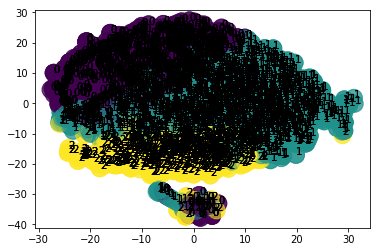

In [74]:
for index, t in enumerate(temp):    
    print (str(assigned_clusters[index]) + ":" + str(t))
    
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)
 
model = TSNE(n_components=3, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
for j in range(len(temp)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  temp[j]))
 
 
plt.show()

In [13]:
fig = plt.figure()
plt.savefig('plot.png')

<Figure size 432x288 with 0 Axes>

In [76]:
Z=[]
for t in test:
    Z.append(sent_vectorizer(t, model))    

In [83]:
sent_vectorizer(data['abstract'][1],mode

array([], dtype=float64)

In [85]:
len(Z)

124